In [1]:
# importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(r'data.csv')

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.shape

(4600, 18)

As can been seen there are 18 columns and 4600 rows of data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

since all the values are 4600 we can conclude that threre are  no null values

In [6]:
data.duplicated().sum()

0

Even there are no duplicate values

In [7]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [8]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [9]:
# specifing  the columns to remvove the outliers

colum =['price','bedrooms','bathrooms','sqft_living','sqft_lot','waterfront','view','condition','sqft_above','sqft_basement']
for col in colum:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3- Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]



In [10]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,3.316000e+03,3316.00000,3316.000000,3316.000000,3316.000000,3316.000000,3316.0,3316.0,3316.000000,3316.000000,3316.000000,3316.000000,3316.000000
mean,4.469004e+05,3.26146,1.997286,1837.303076,7026.547648,1.491104,0.0,0.0,3.452051,1602.715320,234.587756,1970.381484,809.420688
std,1.928517e+05,0.77095,0.647591,619.633395,3412.850688,0.545373,0.0,0.0,0.665318,614.226407,355.348334,30.268932,979.477778
min,0.000000e+00,2.00000,0.750000,580.000000,681.000000,1.000000,0.0,0.0,2.000000,580.000000,0.000000,1900.000000,0.000000
25%,3.000000e+05,3.00000,1.500000,1360.000000,4622.750000,1.000000,0.0,0.0,3.000000,1130.000000,0.000000,1950.000000,0.000000
50%,4.150000e+05,3.00000,2.000000,1780.000000,7034.500000,1.500000,0.0,0.0,3.000000,1440.000000,0.000000,1973.000000,0.000000
75%,5.600000e+05,4.00000,2.500000,2250.000000,9042.750000,2.000000,0.0,0.0,4.000000,1980.000000,490.000000,1998.000000,1999.000000
max,1.150000e+06,5.00000,3.500000,3910.000000,18362.000000,3.500000,0.0,0.0,5.000000,3340.000000,1250.000000,2014.000000,2014.000000


In [11]:
data['age'] = 2024 - data['yr_built']

data['renovated'] = data['yr_renovated'].apply(lambda x : 0 if x== 0 else 1)

In [12]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,age,renovated
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,69,1
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,58,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,61,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,48,1
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,86,1


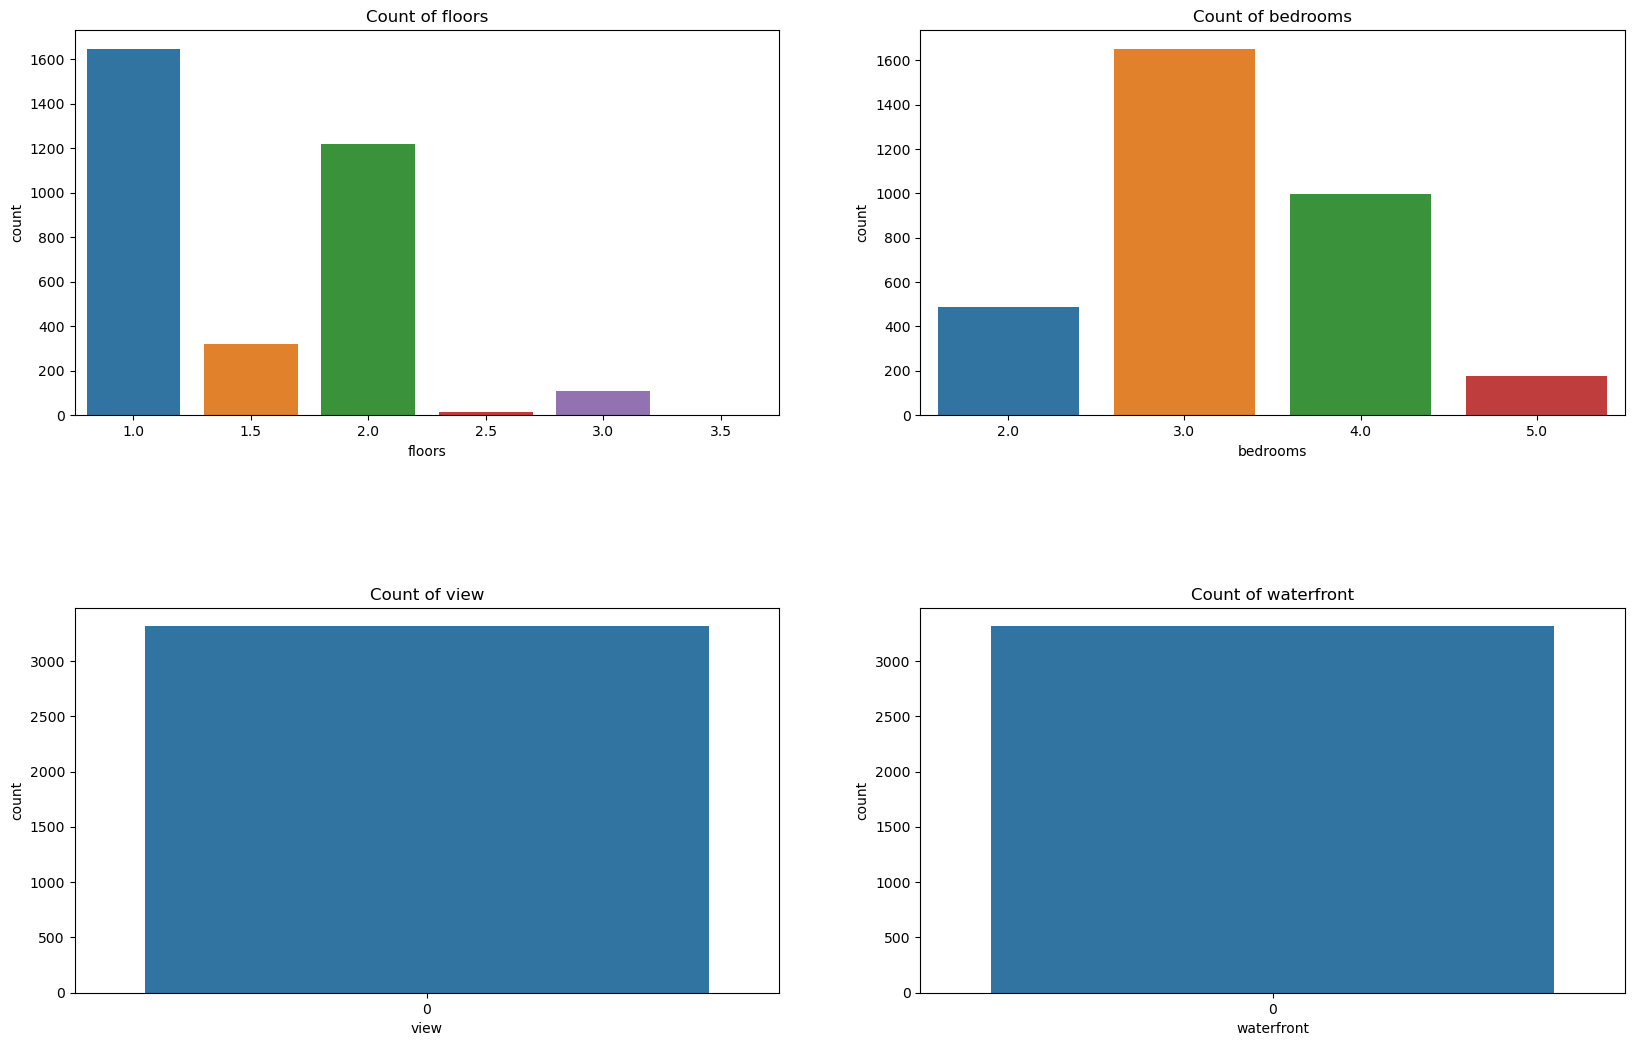

In [13]:
features = data[['floors','bedrooms','view','waterfront',]]
plt.figure(figsize = (20,20))
for i,col in enumerate(features):
    plt.subplot(3,2,i+1)
    sns.countplot(x= col ,data= data)
    plt.title(f'Count of {col}')
    plt.subplots_adjust(hspace =0.5)

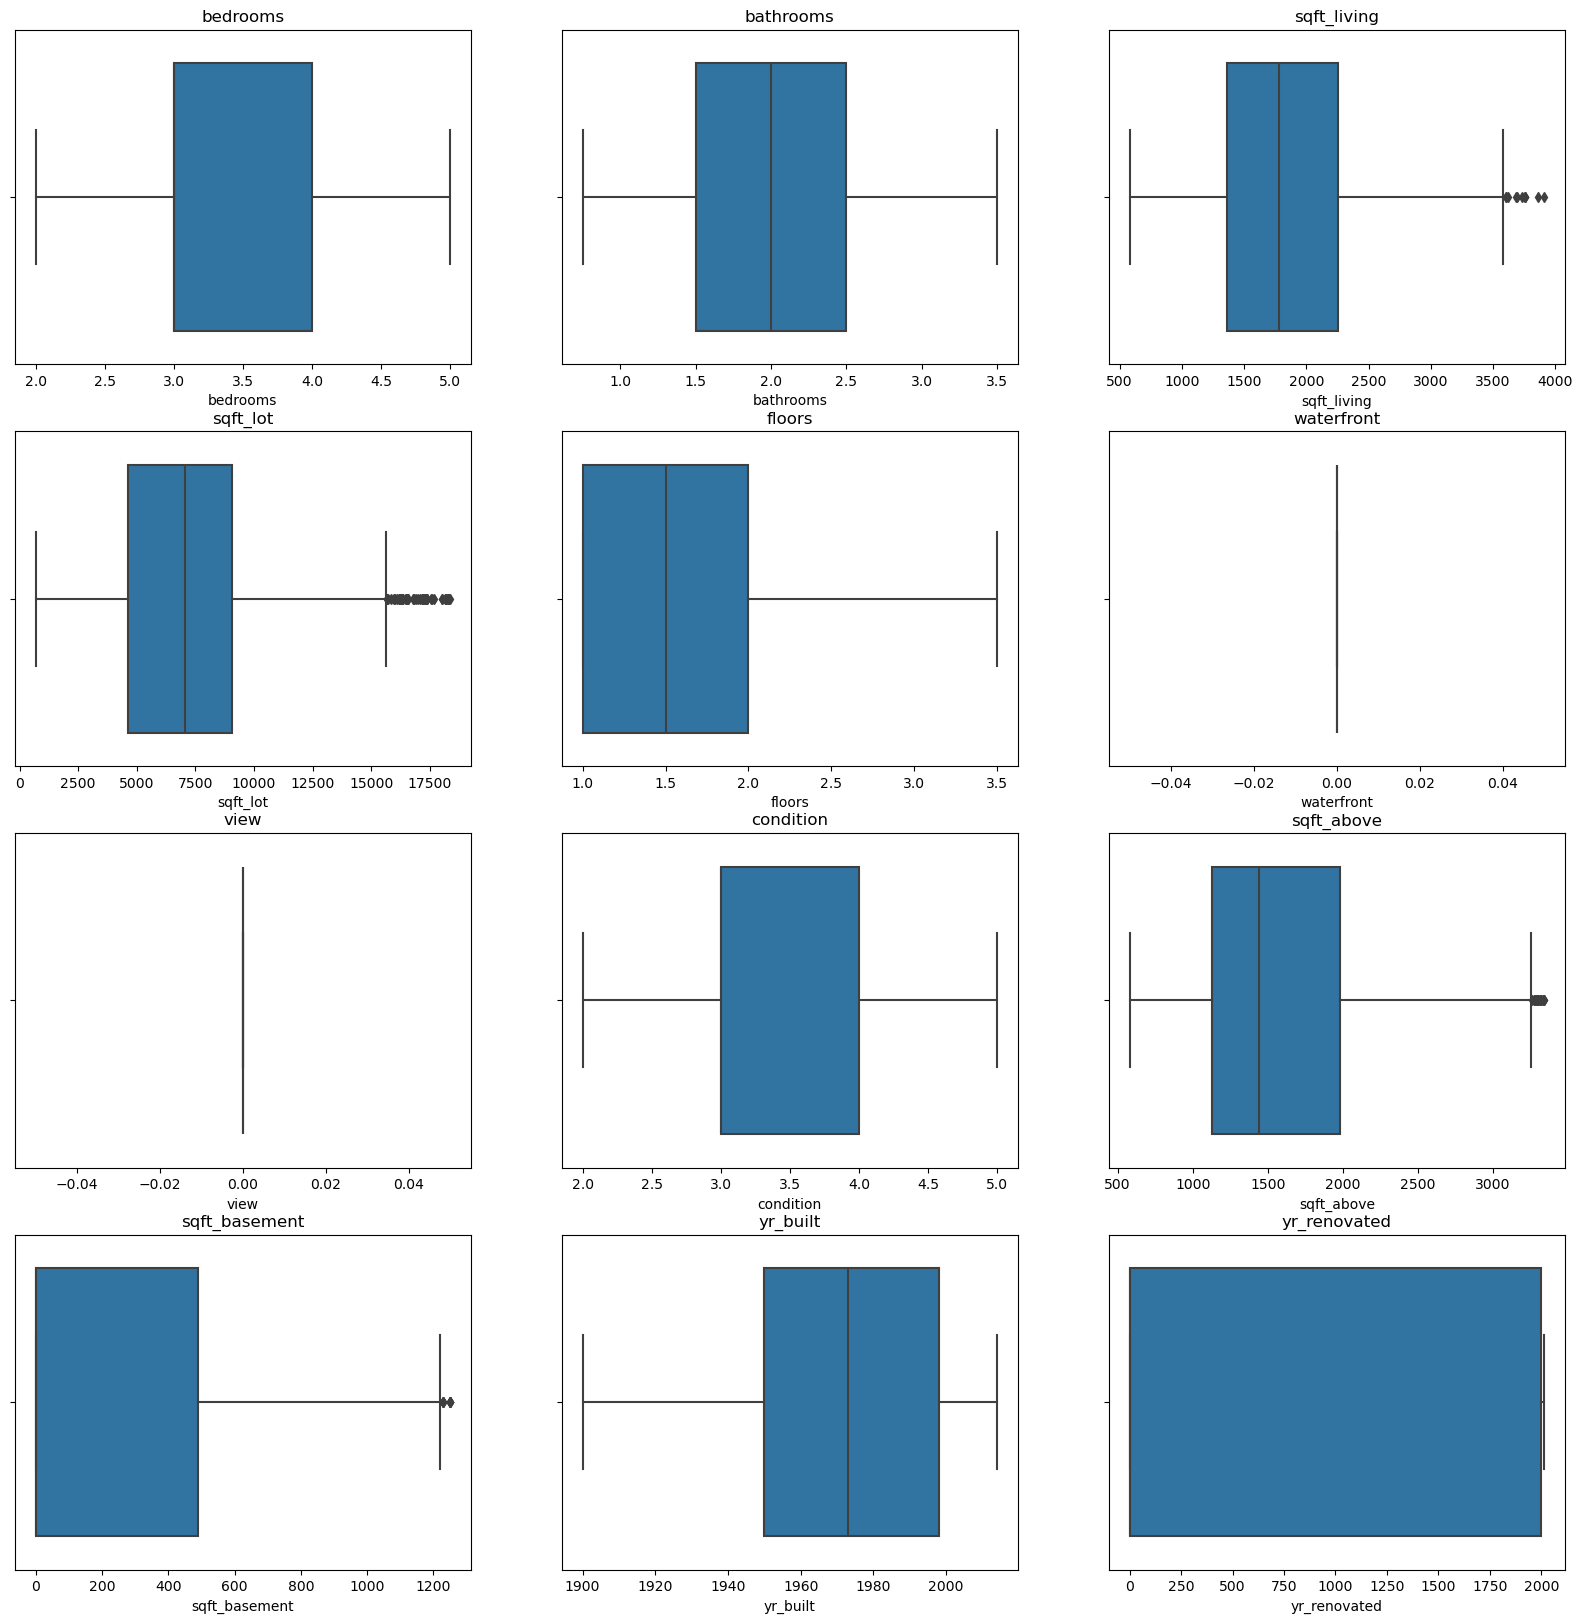

In [14]:
feature_real = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront',
                'view', 'condition', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated']

plt.figure(figsize=(20,20))
for i, col in enumerate(feature_real):
    plt.subplot(4,3,i+1)
    sns.boxplot(x = data[col])
    plt.title(f'{col}')

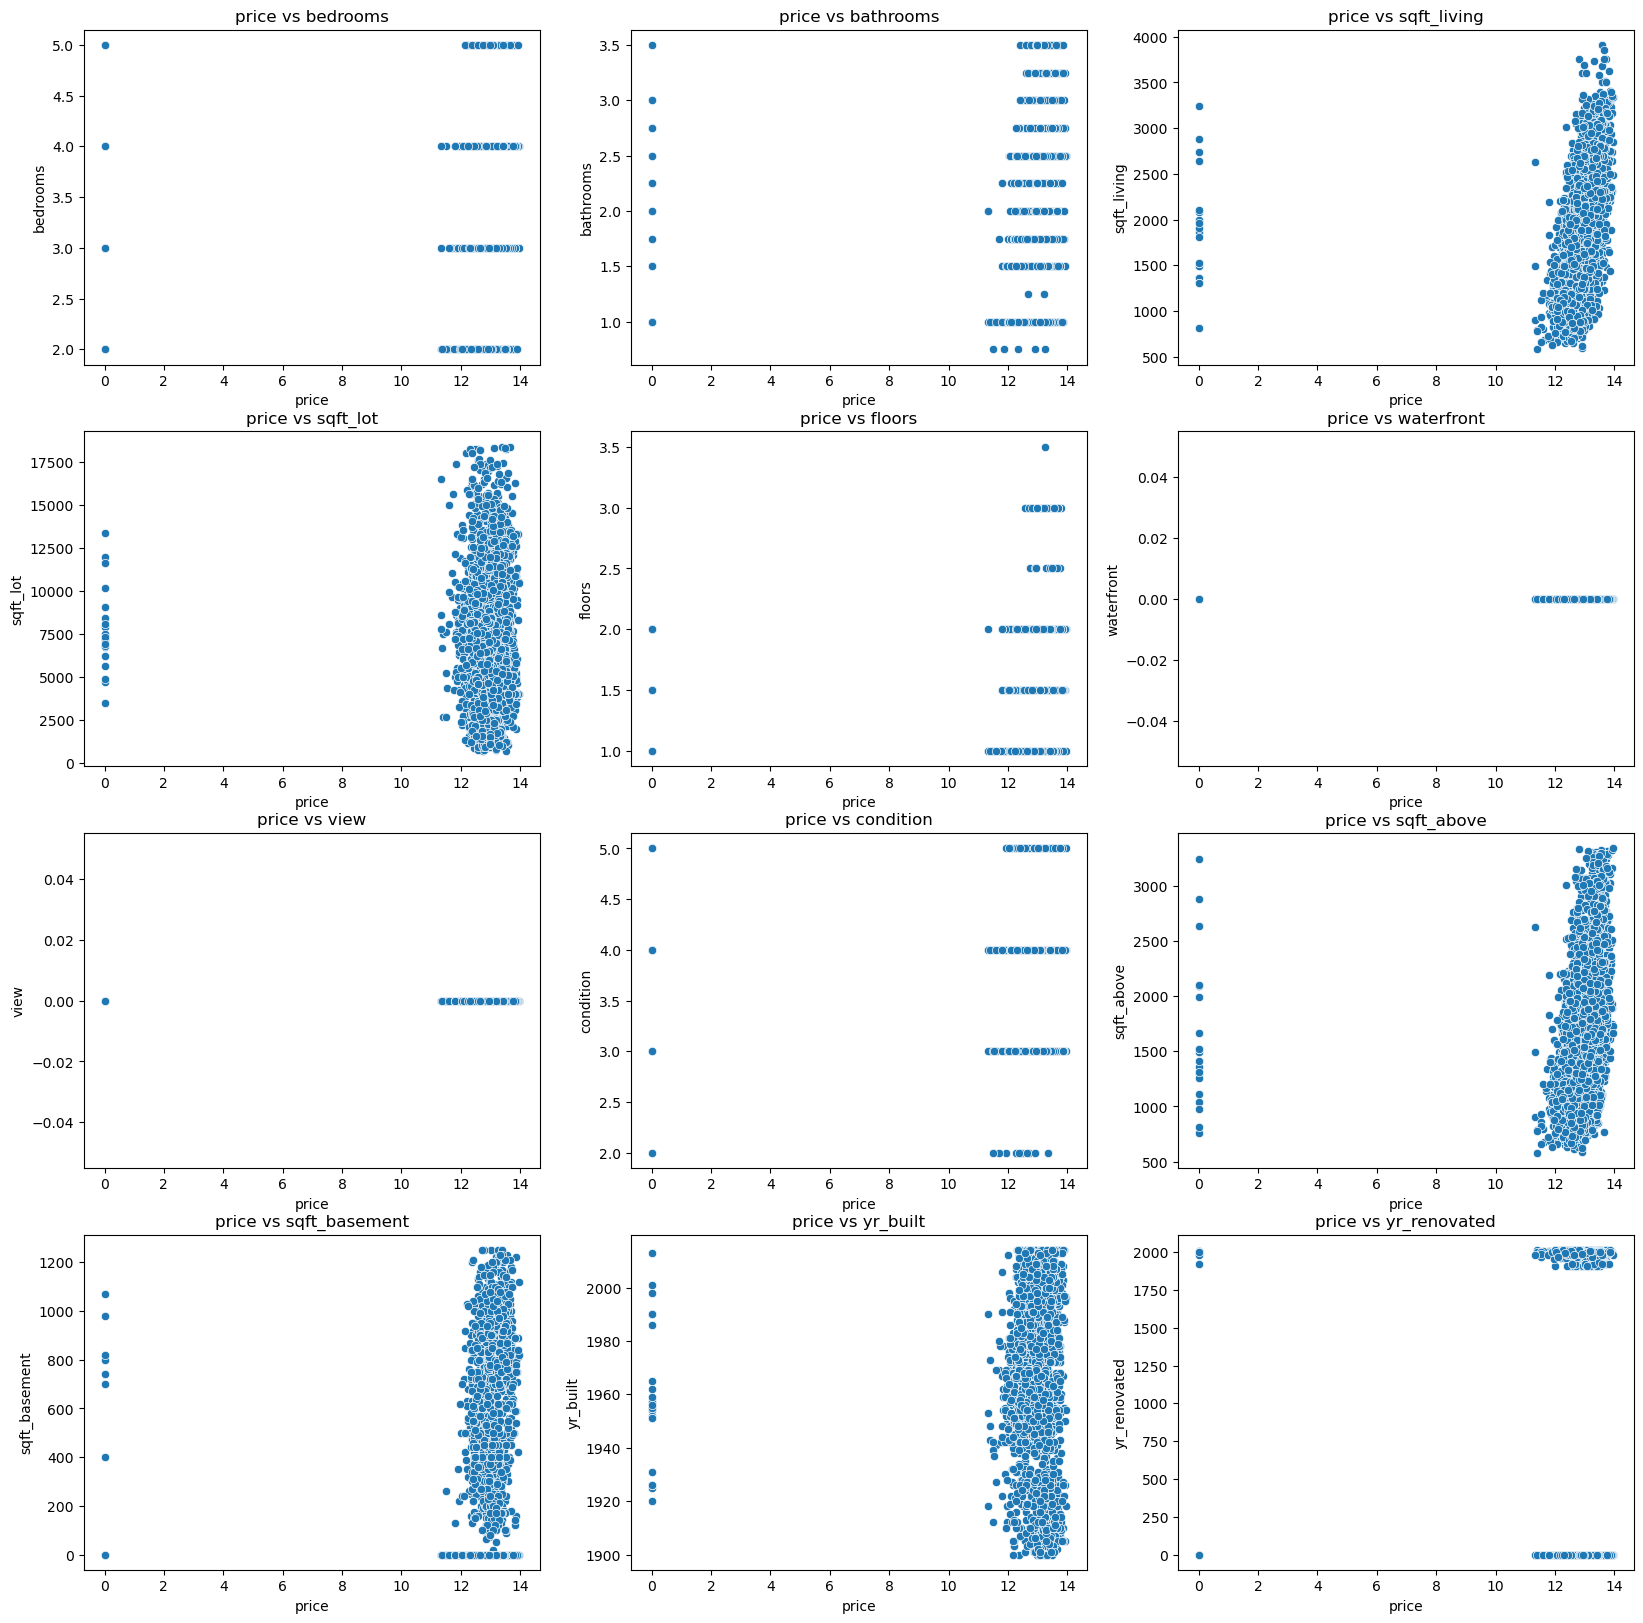

In [15]:
feature_real = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront',
                'view', 'condition', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated']

plt.figure(figsize=(20,20))
for i, col in enumerate(feature_real):
    plt.subplot(4,3,i+1)
    sns.scatterplot(y = data[col], x = np.log1p(data['price']))
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(f'price vs {col}')
    
    

In [16]:
col=data.select_dtypes('object').columns

for i in col:
    data[i] = data[i].astype('category')
    data[i] = data[i].cat.codes

In [17]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,age,renovated
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1121,35,61,0,69,1
2,0,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,1645,18,25,0,58,0
3,0,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3059,3,7,0,61,0
4,0,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,3132,30,30,0,48,1
5,0,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,2502,34,53,0,86,1


In [18]:
X = data.drop(['price','date','yr_built','yr_renovated','country','street','renovated'],axis= 1)
y = data['price']

In [19]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print(normalized_df)

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0     0.333333   0.272727     0.228228  0.408970     0.2         0.0   0.0   
1     0.333333   0.454545     0.405405  0.637181     0.0         0.0   0.0   
2     0.333333   0.545455     0.426426  0.415644     0.0         0.0   0.0   
3     0.666667   0.636364     0.408408  0.555342     0.0         0.0   0.0   
4     0.000000   0.090909     0.090090  0.322323     0.0         0.0   0.0   
...        ...        ...          ...       ...     ...         ...   ...   
3311  0.333333   0.363636     0.279279  0.321192     0.0         0.0   0.0   
3312  0.333333   0.636364     0.264264  0.389797     0.4         0.0   0.0   
3313  0.333333   0.636364     0.729730  0.358181     0.4         0.0   0.0   
3314  0.666667   0.454545     0.453453  0.336463     0.0         0.0   0.0   
3315  0.333333   0.636364     0.273273  0.419716     0.4         0.0   0.0   

      condition  sqft_above  sqft_basement      city  statezip 

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [21]:
#tree_reg = DecisionTreeRegressor()

In [22]:
#tree_reg.fit(X_train,y_train)

In [23]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
#y_pred = tree_reg.predict(X_test)

# Checking the accuracy score
from sklearn.metrics import r2_score

r2_score(y_test,y_pred) 

0.7137180645723775

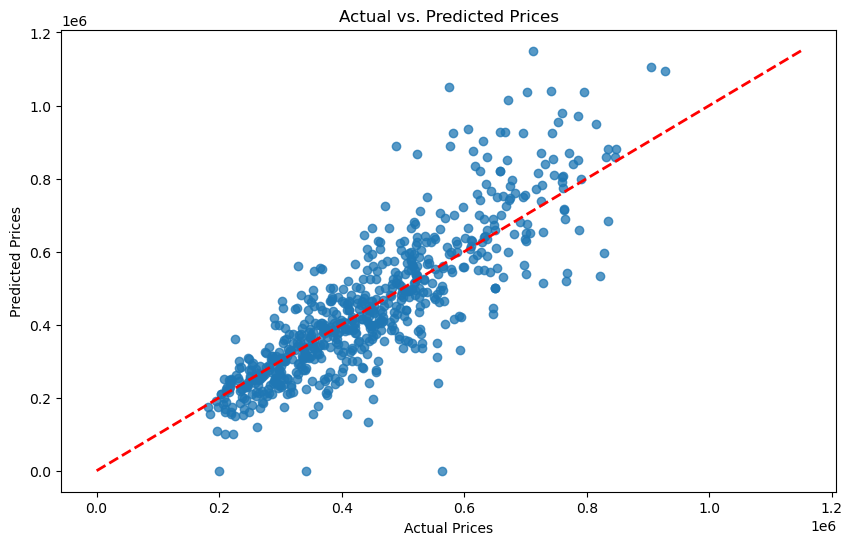

In [25]:
plt.figure(figsize = (10,6))
plt.scatter(y_pred, y_test, alpha=0.75)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],'--r',lw=2)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()